In [43]:
import keras

(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()

In [44]:
train_scaled = train_input / 255.0

from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, cal_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

In [45]:
# Flatten() 층 : 다차원 배열 입력 -> 1차원 배열 입력
model = keras.Sequential()
model.add(keras.layers.Input(shape=(28, 28)))  # 이전에는 28 * 28로 펼쳐서 1D로 만들었는데, 여기선 2D로 그대로 받는다. 그러면 Flatten()이 알아서 펼쳐줌.
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [46]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

hist = model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 976us/step - accuracy: 0.7669 - loss: 0.6721
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 982us/step - accuracy: 0.8515 - loss: 0.4037
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 984us/step - accuracy: 0.8719 - loss: 0.3546
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8843 - loss: 0.3281  
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 974us/step - accuracy: 0.8869 - loss: 0.3197


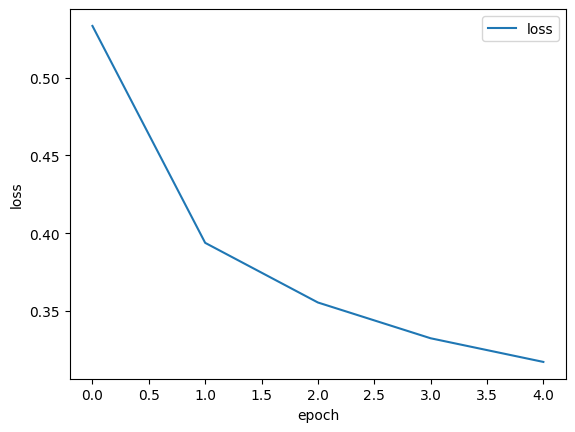

In [47]:
import matplotlib.pyplot as plt

# loss값 감소 그래프
plt.plot(hist.history['loss'], label='loss')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

**옵티마이저**: 손실값으로 가중치와 절편 조정 후 다시 학습 (에포크 단위) -> 역전파(Backpropagation)
- 기본 경사 하강법 옵티마이저
    - SGD
        - 모멘텀 최적화
        - 네스테로프 경사 가속

- 적응적 학습률 경사하강법 옵티마이저
    - AdaGrad
    - RMSprop

- 적응적 학습률 + 모멘텀 최적화
    - Adam

- learning_rate: 학습률 / 기본값 - 0.1

In [48]:
# Flatten() 층 : 다차원 배열 입력 -> 1차원 배열 입력
model = keras.Sequential()
model.add(keras.layers.Input(shape=(28, 28)))  # 이전에는 28 * 28로 펼쳐서 1D로 만들었는데, 여기선 2D로 그대로 받는다. 그러면 Flatten()이 알아서 펼쳐줌.
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [49]:
# Adam 옵티마이저 적용
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# learning_rate를 직접 설정한 Adam 옵티마이저 적용
adam = keras.optimizers.Adam(learning_rate=0.0001)  # learning_rate가 설정된 Adam 객체
model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

hist = model.fit(train_scaled, train_target, epochs=5)
hist.history

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6562 - loss: 1.0996
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8254 - loss: 0.5283
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8446 - loss: 0.4612
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8509 - loss: 0.4339
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8565 - loss: 0.4132


{'accuracy': [0.7529791593551636,
  0.8306249976158142,
  0.8452708125114441,
  0.8526458144187927,
  0.8574166893959045],
 'loss': [0.7821924090385437,
  0.5086819529533386,
  0.4578281342983246,
  0.4295702576637268,
  0.4102954566478729]}

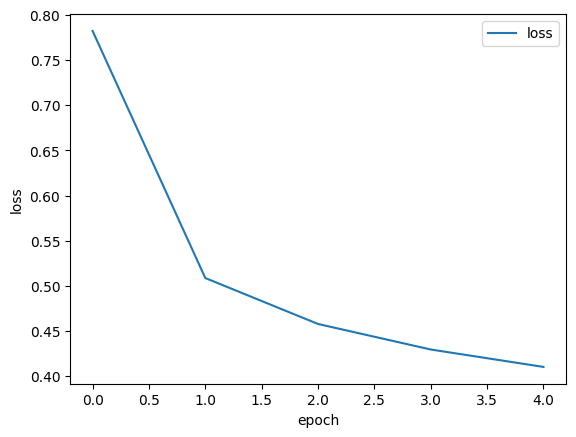

In [50]:
# loss값 감소 그래프
plt.plot(hist.history['loss'], label='loss')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()